In [1]:
#Q1 and 2

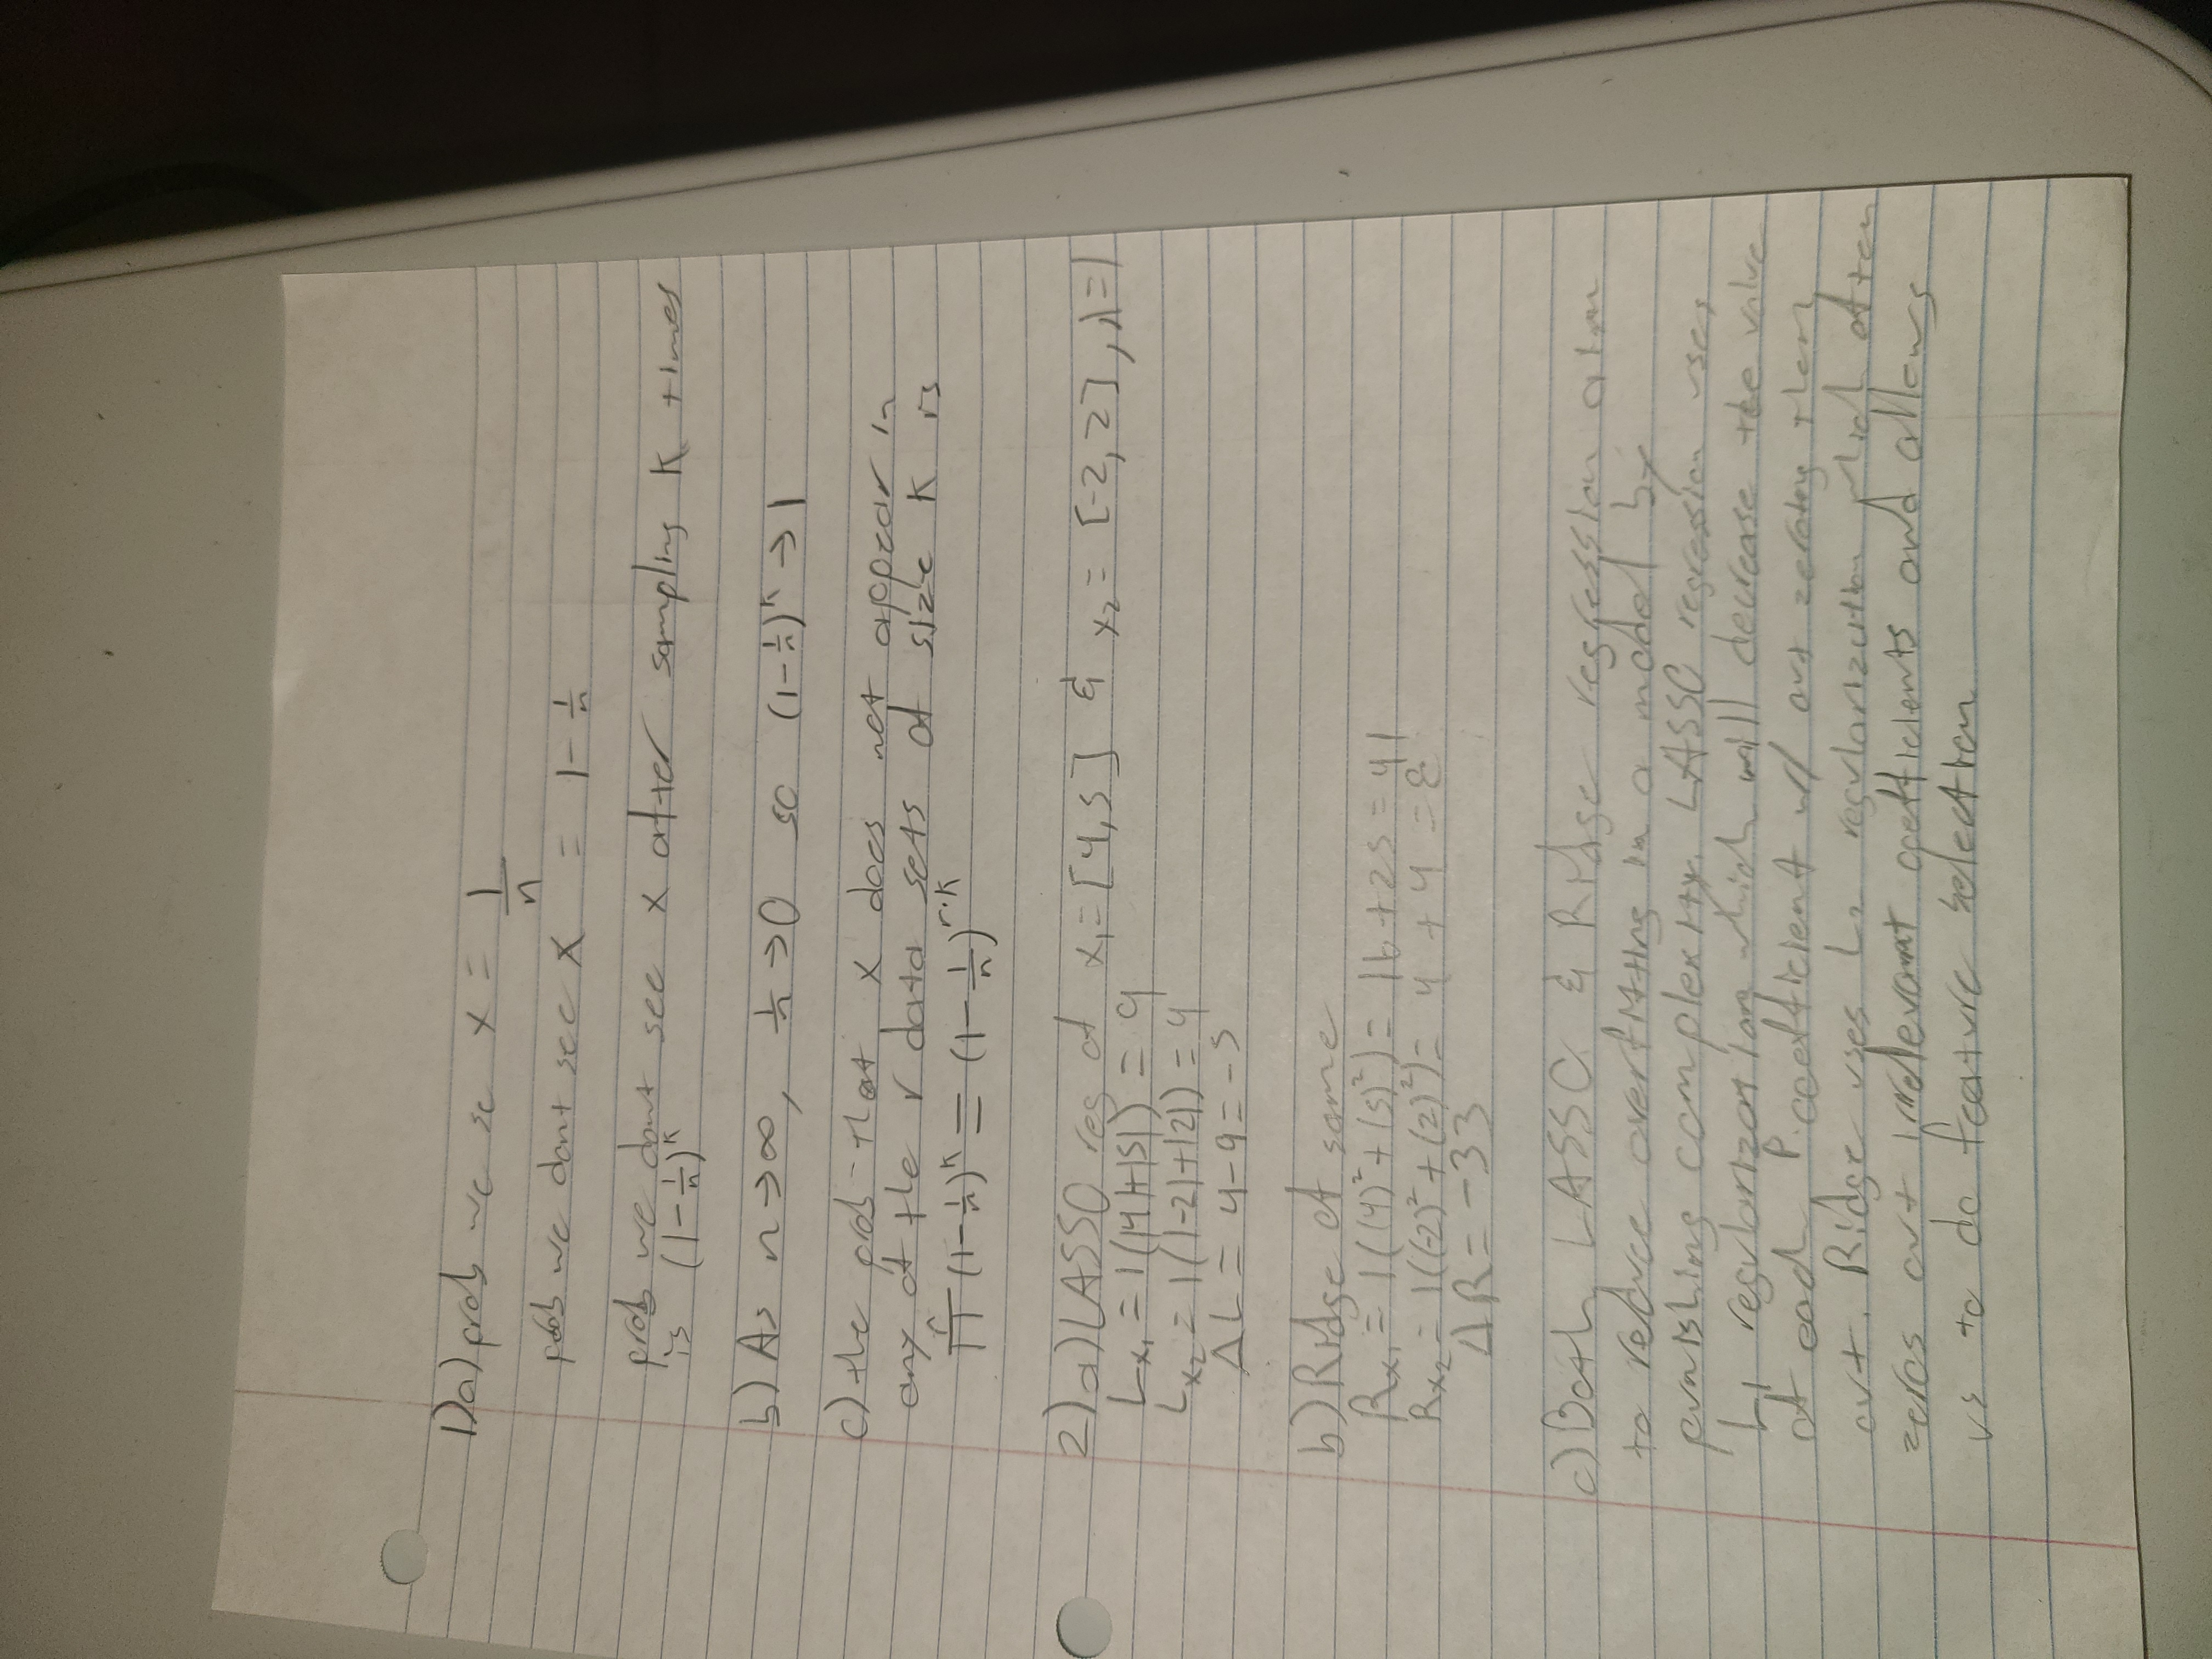

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [3]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

def draw_contour(x,y,clf, class_labels = ["Negative", "Positive"]):
    """
    Draws a contour line for the predictor
    
    Assumption that x has only two features. This functions only plots the first two columns of x.
    
    """
    
    X0, X1 = x[:, 0], x[:, 1]
    xx0, xx1 = make_meshgrid(X0,X1)
    
    plt.figure(figsize = (10,6))
    plot_contours(clf, xx0, xx1, cmap="PiYG", alpha=0.8)
    scatter=plt.scatter(X0, X1, c=y, cmap="PiYG", s=30, edgecolors="k")
    plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)

    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())

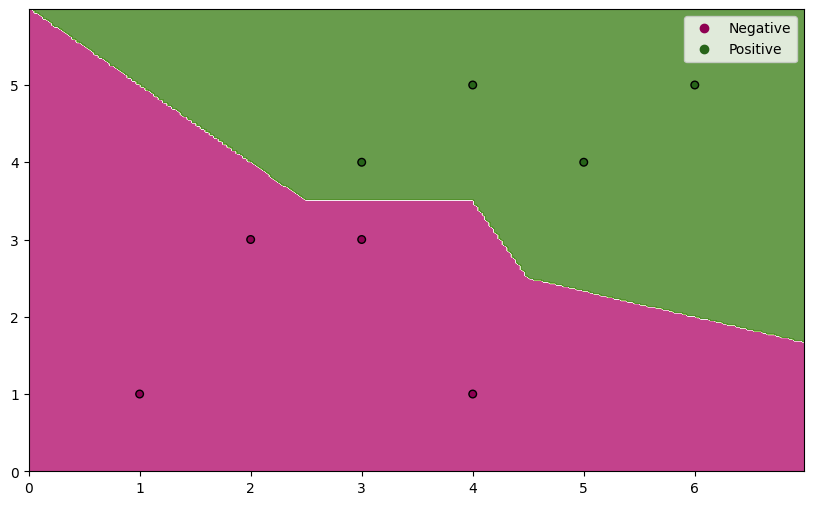

In [4]:
# Your code here - use draw_contour() for showing the Voronoi regions, the other functions are called inside it.
xx =  np.asarray([[1, 1], [4, 1], [2, 3], [3, 3], [3, 4], [5, 4], [6, 5], [4, 5]])
#print(xx)
yy = np.asarray([0,0,0,0,1,1,1,1])
#print(yy)
knn_clf_1 = KNeighborsClassifier(n_neighbors=1).fit(xx,yy)
knn_clf_2 = KNeighborsClassifier(n_neighbors=2).fit(xx,yy)
knn_clf_3 = KNeighborsClassifier(n_neighbors=3).fit(xx,yy)
knn_clf_4 = KNeighborsClassifier(n_neighbors=4).fit(xx,yy)
draw_contour(x=xx, y=yy, clf=knn_clf_1, class_labels = ["Negative", "Positive"])

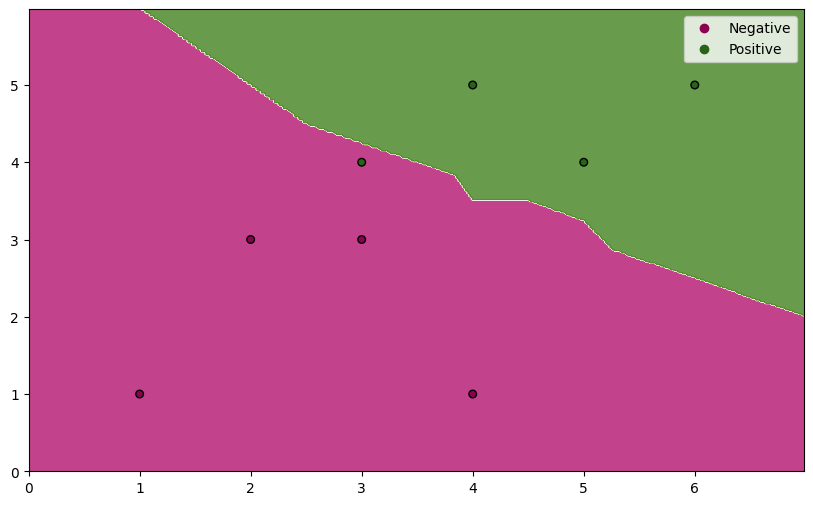

In [5]:
draw_contour(x=xx, y=yy, clf=knn_clf_2, class_labels = ["Negative", "Positive"])

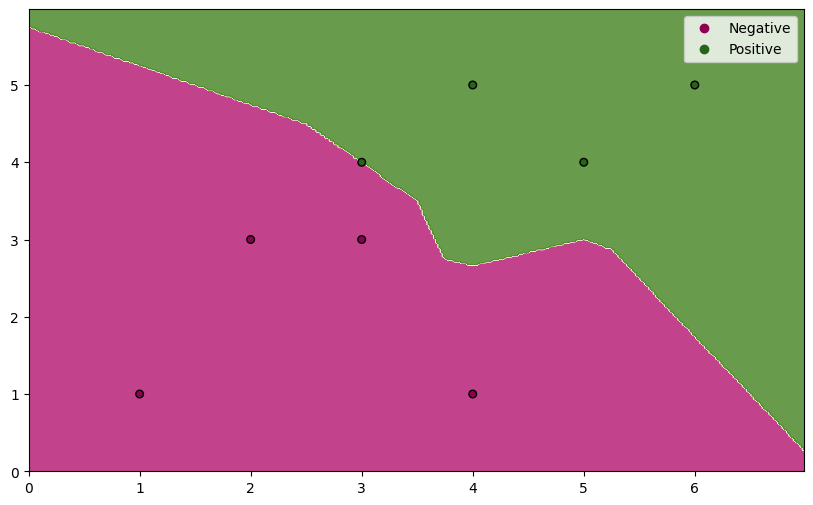

In [6]:
draw_contour(x=xx, y=yy, clf=knn_clf_3, class_labels = ["Negative", "Positive"])

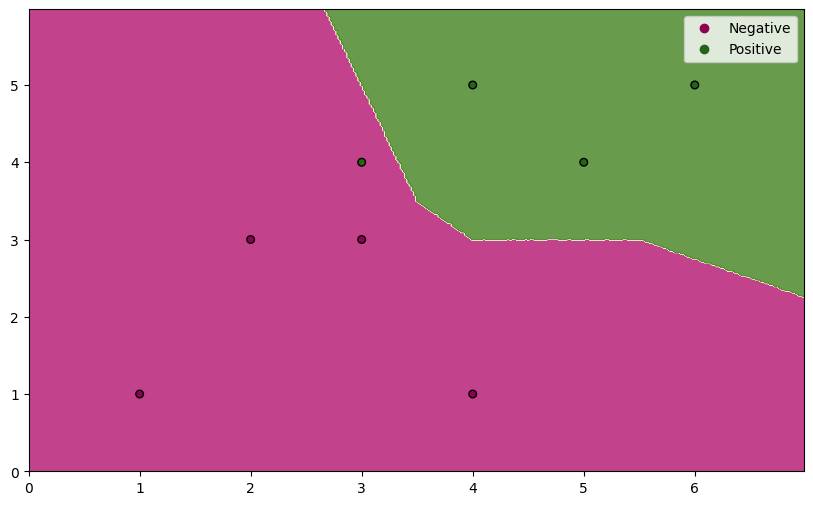

In [7]:
draw_contour(x=xx, y=yy, clf=knn_clf_4, class_labels = ["Negative", "Positive"])
#We can see that a k>1 results in incorrectly classifying some points.
#Based on the graphs, it appears to choose negative when ties occur.

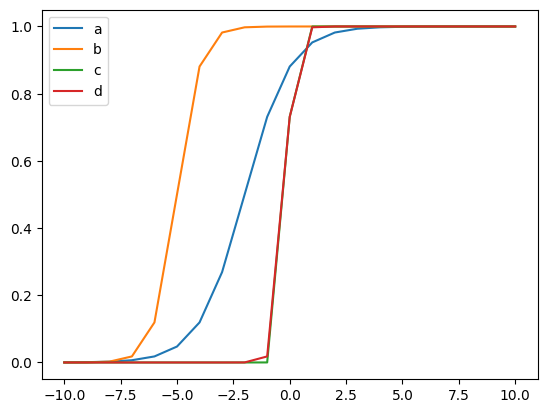

In [8]:
#Q4
def log_fxn(x, b0, b1):
    return 1/(1+np.exp(-1*(b0 + b1*x)))

x = np.asarray(list(range(-10,11)))
ya = log_fxn(x, 2, 1)
yb = log_fxn(x, 10, 2)
yc = log_fxn(x, 1, 10)
yd = log_fxn(x, 1, 5)
plt.plot(x,ya, label="a")
plt.plot(x,yb, label="b")
plt.plot(x,yc, label="c")
plt.plot(x,yd, label="d")
plt.legend()
plt.show()
#the function becomes steepest for b0 = 1 and b1=10.

Q5)
a)We use ridge regression over linear regression to prevent overfitting.  Ridge regression punishes overly complex
models while linear regression does not.
b)As lambda increases, beta will decrease since lambda is the pentalty coefficient.  The larger B is, the larger
out penalty which we want to avoid.  Thus it will eventually converge to 0 as lambda increases
c)See image below

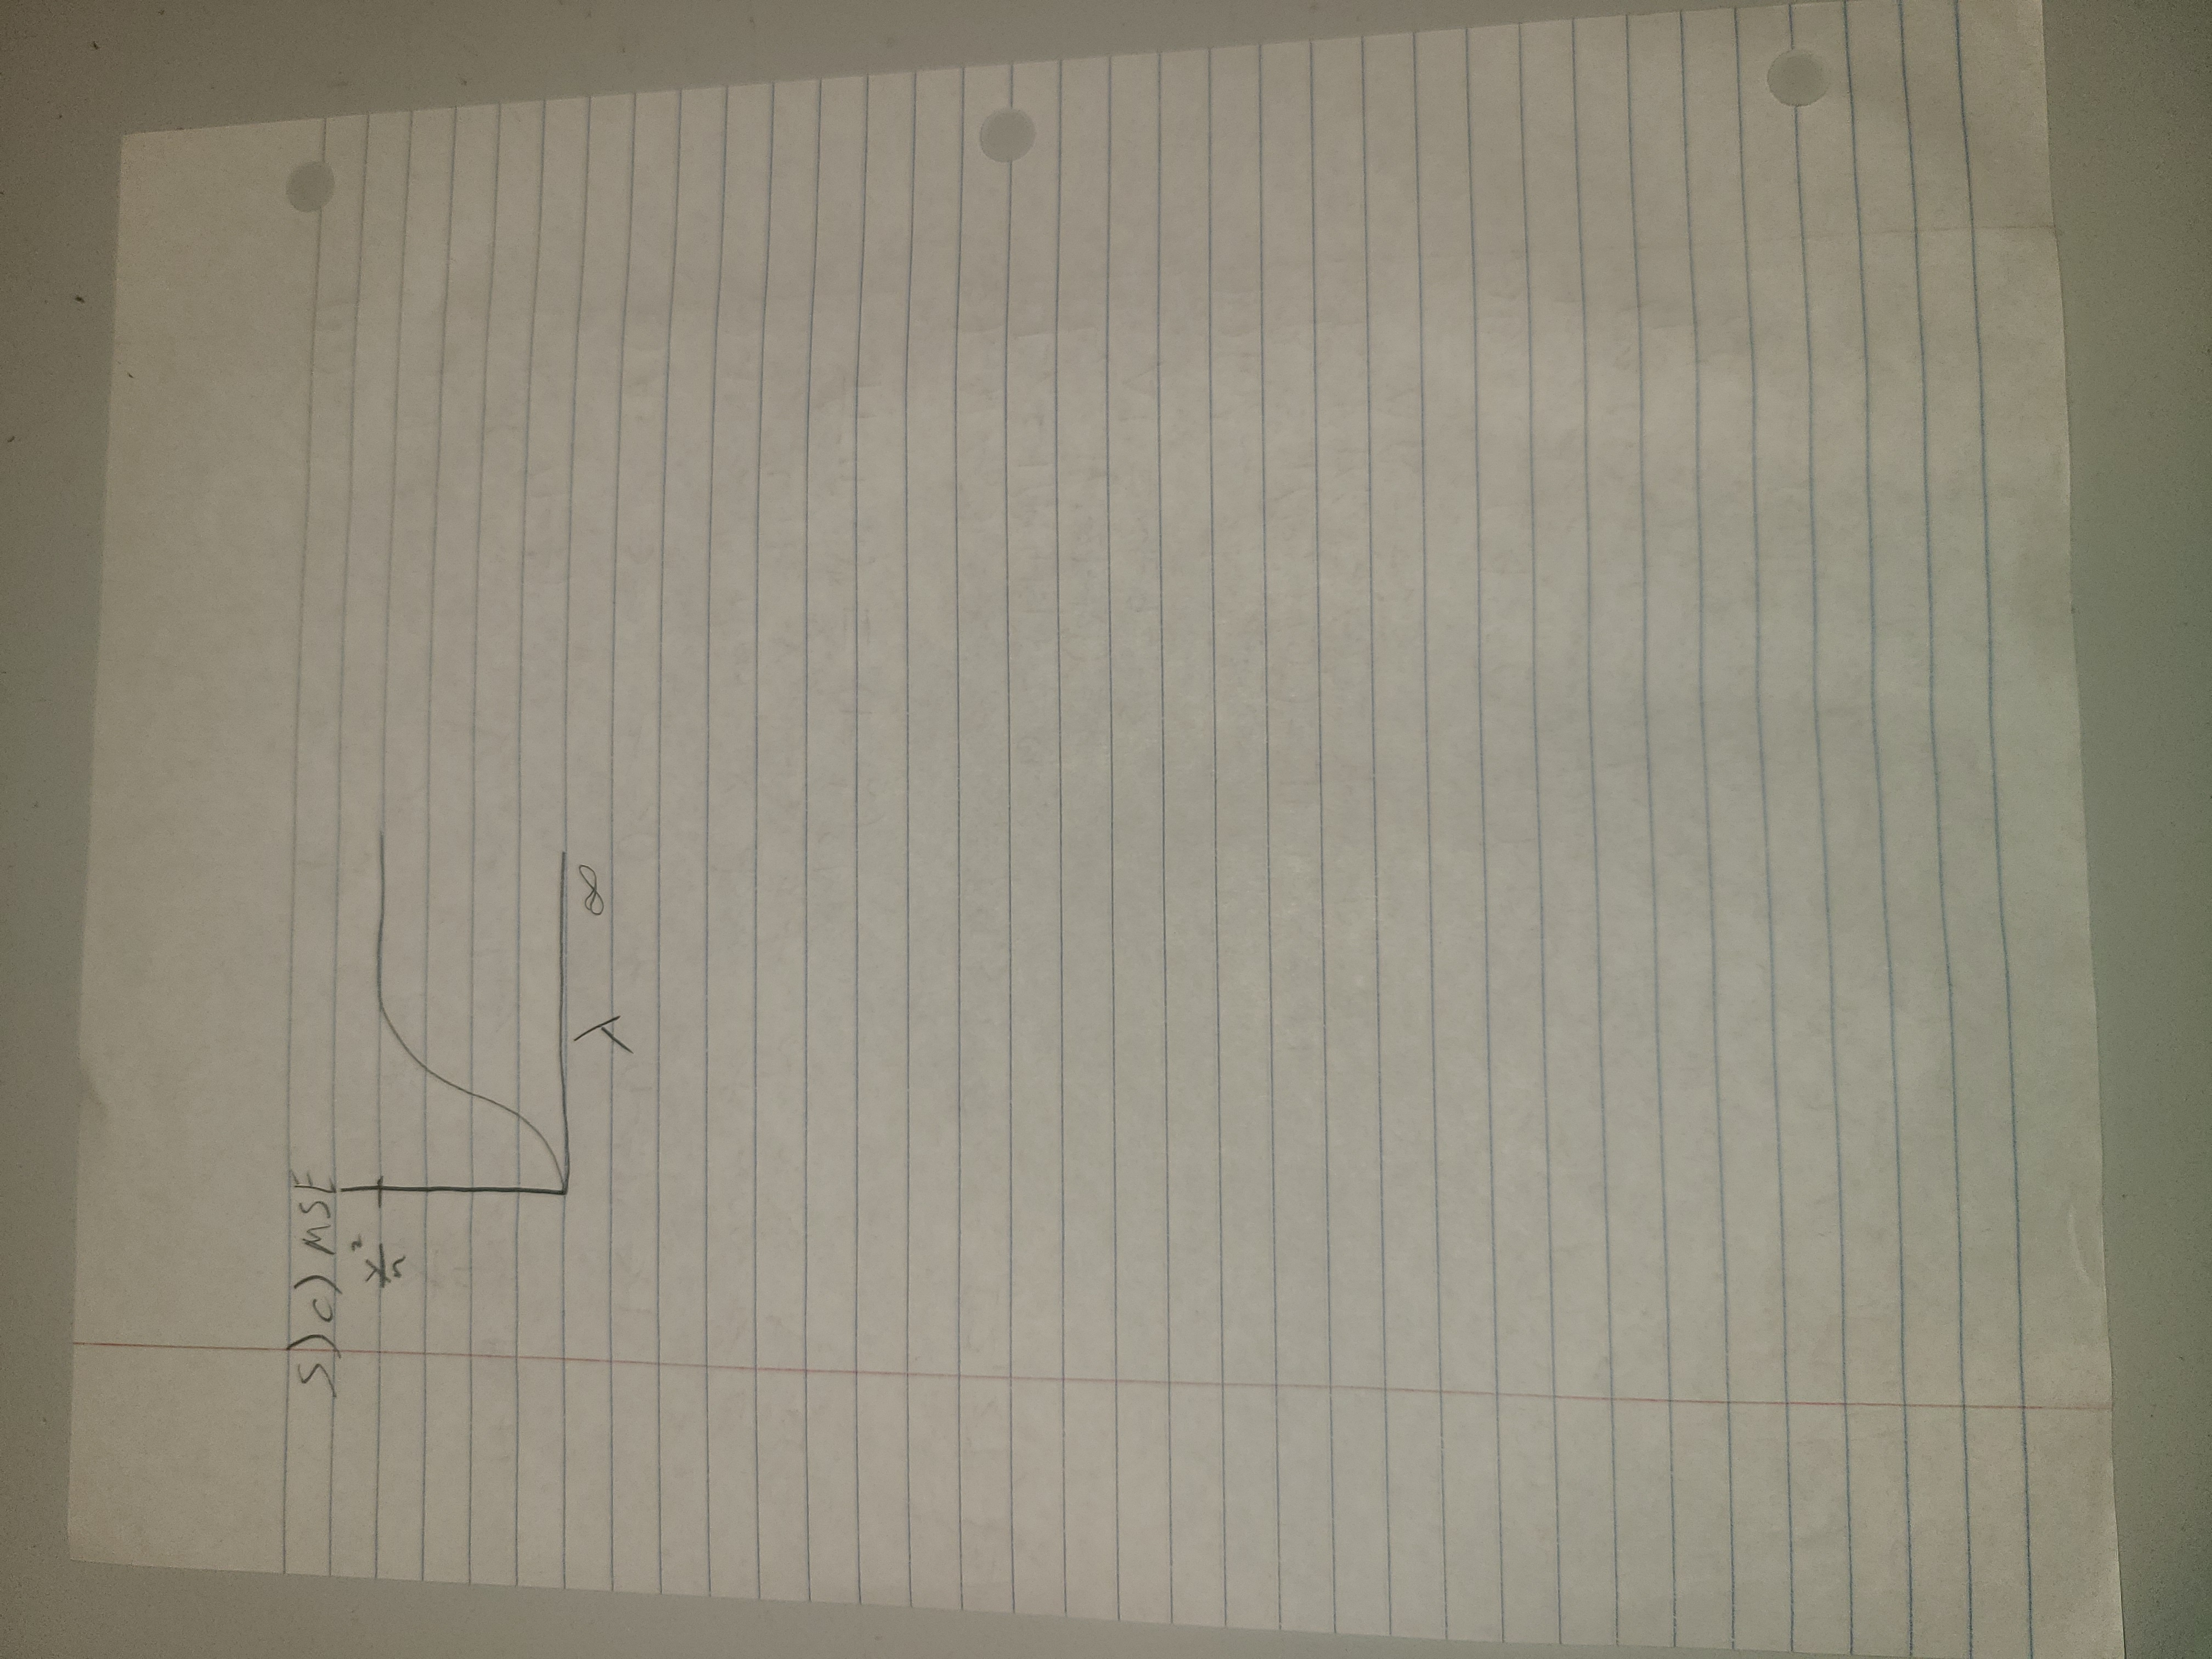

Q6
a)True, l2 regularizations tends to zero out multiple values as it heavily punishes the beta values by squaring them.
b)False, in leave one out cross validation we create and train n models.
c)False, a 95% confidence interval indicates that the point will be in the expected range 95% of the time the range is resampled.
d)True, with each iteration we choose a feature and only train on the remaining features.
e)True, the equation for conditional probability is p(a|b)=p(b|a)*p(a)/p(b) so if p(a)=p(b) then they cancel each other out in the eqn.